In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean.cm as cmocean
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client
import matplotlib.path as mpath
import datetime as dt
import xgcm

import xesmf
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

from netCDF4 import Dataset # to work with NetCDF files

In [2]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:35297 Dashboard: /proxy/34083/status,Cluster Workers: 4 Cores: 4 Memory: 100.00 GiB


In [3]:
#https://climatedataguide.ucar.edu/climate-data/sea-ice-concentration-data-overview-comparison-table-and-graphs

#https://climatedataguide.ucar.edu/climate-data/sea-ice-concentration-data-hadisst
#this data gets a few maude polynyas .. but not a lot
#monthy sic from 1870/01 to 2018/10

#http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.html
#try this data source once trump get fucked

In [4]:
# Extract the variables
ice_file ='/g/data/v45/pas561/mom/archive/wp2_figs/HadISST_ice.cat.nc'
nc = Dataset(ice_file, mode='r') # file handle, open in read only mode
had_sic = nc.variables['sic'][:]
had_lon = nc.variables['longitude'][:]
had_lat = nc.variables['latitude'][:]
nc.close() # close the file
print(had_sic.shape, had_lat.shape, had_lon.shape)

(1798, 180, 360) (180,) (360,)


In [5]:
#print had_lon

[0.2]


['July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']


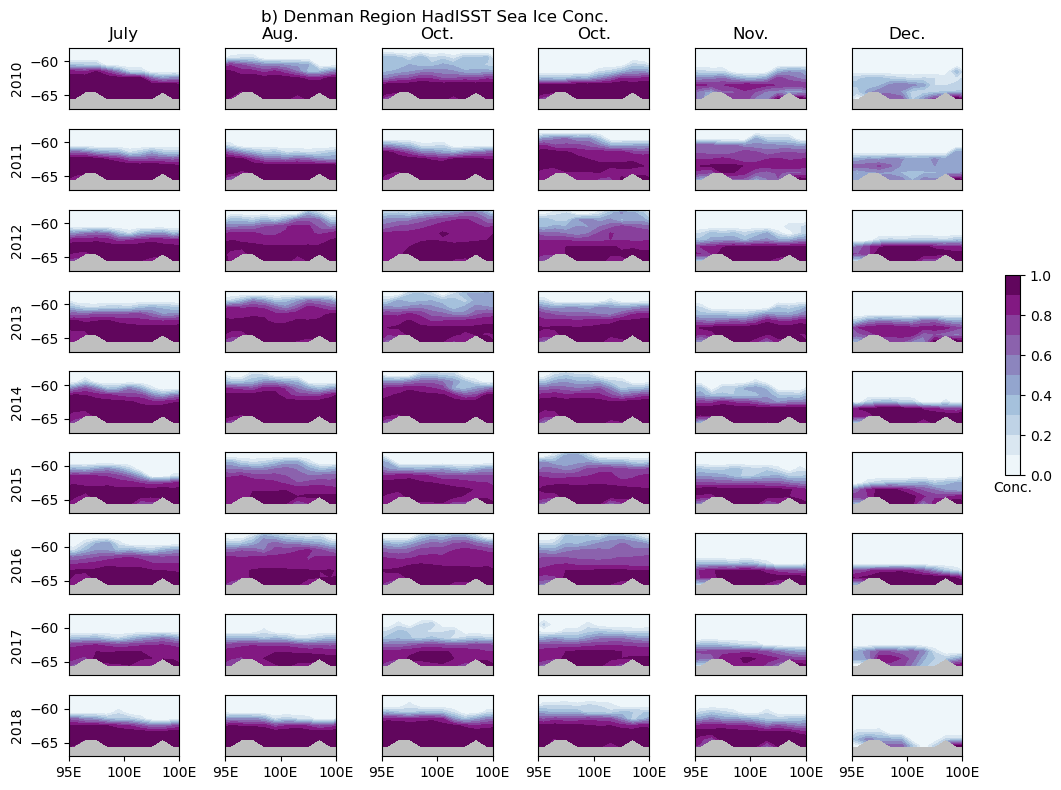

In [18]:
#(1972-1870+1)*12=1236

plt.figure(figsize=(10,8))

tits=['July','Aug.','Sept.','Oct.', 'Nov.','Dec.']
yrs=np.arange(2010,2019,1)
print(tits)

numyrs=9
ii=0

clev = np.arange(0,1.1,.1)
        
cnt=2010-1870

for yr in range(0,numyrs):
    for i in range(6,12): 
            
        plt.subplot(numyrs,6,ii+1)
        plt.gca().patch.set_color('.75')
        
        p1=plt.contourf(had_lon,had_lat,had_sic[(cnt+yr)*12+i,:,:],cmap=plt.cm.BuPu,levels=clev)
        #p2=plt.contour(had_lon,had_lat,had_sic[(cnt+yr)*12+i,:,:],levels=clev2,colors='y',linewidths=3)
        
        #print((cnt+yr)*12+i)
        
        plt.ylim((-67,-58))        
        plt.xlim([95,105])
        
        if yr==0:
            if i==8:
                titstr='b) Denman Region HadISST Sea Ice Conc. \n'+tits[i-5]
                #print(titstr)
                plt.title(titstr)
            else:
                plt.title(tits[i-6])
           
        if yr==numyrs-1:
            plt.gca().axes.get_xaxis().set_ticks([95, 100, 105])
            plt.gca().axes.set_xticklabels(['95E', '100E', '100E'])
        else:
            plt.gca().axes.get_xaxis().set_ticks([])
            
        if i==6:
            plt.ylabel(yrs[yr])
            plt.gca().axes.get_yaxis().set_ticks([-65, -60])
            #plt.gca().axes.set_yticklabels(['70S','65S', '60S'])    
        else:
            plt.gca().axes.get_yaxis().set_ticks([])
            
        
        ii+=1

ax3 = plt.axes([1.01,0.4,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
cb.ax.set_xlabel('Conc.')

plt.tight_layout()

['Jan', 'Feb', 'Mar', 'April', 'May', 'June']


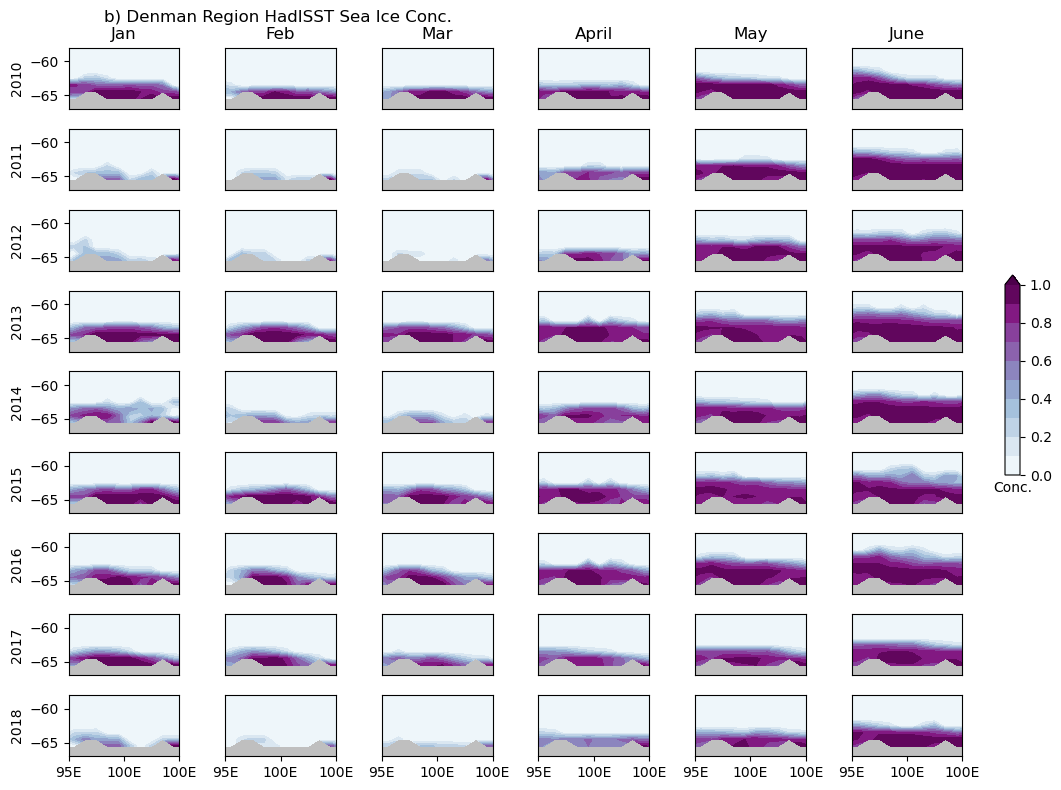

In [19]:
#(1972-1870+1)*12=1236

plt.figure(figsize=(10,8))

tits=['Jan','Feb','Mar','April','May','June']
yrs=np.arange(2010,2019,1)
print(tits)

numyrs=9
ii=0

clev3 = np.arange(2000,2001,1000)
#print(clev3)

clev2 = np.arange(0.30,0.31,1)
#print(clev2)

cnt=2010-1870

for yr in range(0,numyrs):
    for i in range(0,6): 
            
        clev = np.arange(0,1.1,.1)
        plt.subplot(numyrs,6,ii+1)
        plt.gca().patch.set_color('.75')
        
        p1=plt.contourf(had_lon,had_lat,had_sic[(cnt+yr)*12+i,:,:],cmap=plt.cm.BuPu,levels=clev,extend='max')
        #p2=plt.contour(had_lon,had_lat,had_sic[(cnt+yr)*12+i,:,:],levels=clev2,colors='y',linewidths=3)
        
        #print((cnt+yr)*12+i)
        
        plt.ylim((-67,-58))        
        plt.xlim([95,105])
        
        if yr==0:
            if i==1:
                titstr='b) Denman Region HadISST Sea Ice Conc. \n'+tits[i]
                #print(titstr)
                plt.title(titstr)
            else:
                plt.title(tits[i])
           
        if yr==numyrs-1:
            plt.gca().axes.get_xaxis().set_ticks([95, 100, 105])
            plt.gca().axes.set_xticklabels(['95E', '100E', '100E'])
        else:
            plt.gca().axes.get_xaxis().set_ticks([])
            
        if i==0:
            plt.ylabel(yrs[yr])
            plt.gca().axes.get_yaxis().set_ticks([-65, -60])
            #plt.gca().axes.set_yticklabels(['70S','65S', '60S'])    
        else:
            plt.gca().axes.get_yaxis().set_ticks([])
            
        
        ii+=1

ax3 = plt.axes([1.01,0.4,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
cb.ax.set_xlabel('Conc.')

plt.tight_layout()